In [1]:
import analyze_telom_length as atl
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (16, 8)

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [71]:
seq_df = atl.run_telofinder("../../misc/test.telo.blocks.fasta")

Running in single fasta mode on '../../misc/test.telo.blocks.fasta'

 test.telo.blocks 

chrI_ACA_left
---------------------
left telom length =  218
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

utg84
---------------------
left telom length =  114
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrI
---------------------
left telom length =  251
left offset =  0
right telom length =  0
right offset =  0

 ------------------------------- 


 test.telo.blocks 

chrVI
---------------------
left telom length =  370
left offset =  0
right telom length =  21
right offset =  474

 ------------------------------- 



In [72]:
seq_df

pattern  skew   entropy   polynuc  \
test.telo.blocks chrI_ACA_left 0          1.0   1.0  0.647447  1.000000   
                               1          1.0   1.0  0.647447  1.000000   
                               2          1.0   1.0  0.610864  1.000000   
                               3          1.0   1.0  0.610864  1.000000   
                               4          1.0   1.0  0.562335  1.000000   
...                                       ...   ...       ...       ...   
                 chrVI         16146      0.0   0.1  1.235347  0.105263   
                               16147      0.0   0.1  1.235347  0.157895   
                               16148      0.0   0.0  1.248781  0.157895   
                               16149      0.0   0.0  1.279854  0.157895   
                               16150      0.0  -0.1  1.287022  0.157895   

                                        chi2  combined  skew-ent  
test.telo.blocks chrI_ACA_left 0     -0.3848  0.967753  0.352553  
                               1     -0.3848  0.967753  0.352553  
                               2     -0.3264  1.062736  0.389136  
                               3     -0.3264  1.062736  0.389136  
                               4     -0.2580  1.179665  0.437665  
...                                      ...       ...       ...  
                 chrVI         16146 -0.0468 -1.076884 -1.135347  
                               16147 -0.0468 -1.024252 -1.135347  
                               16148  0.0016 -1.089286 -1.248781  
                               16149 -0.0068 -1.128759 -1.279854  
                               16150  0.0466 -1.182527 -1.387022  

[62731 rows x 7 columns]

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


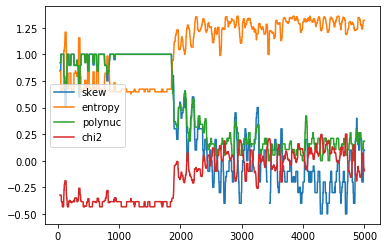

In [83]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:5000, ["skew", "entropy", "polynuc", "chi2"]].rolling(40).median().plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


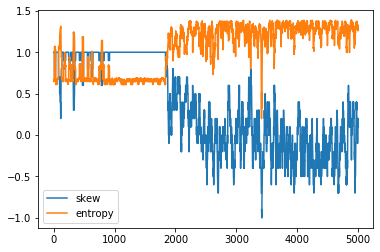

In [86]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:5000, ["skew", "entropy"]].plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


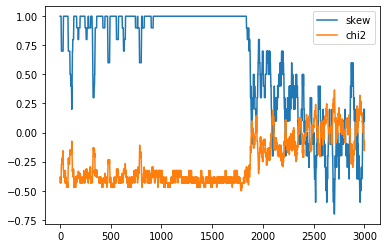

In [88]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:3000, ["skew", "chi2"]].plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


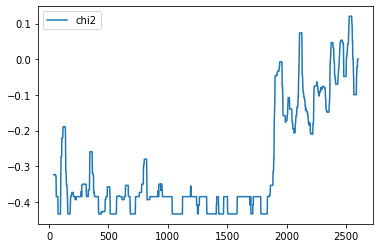

In [75]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:2600, ["chi2"]].rolling(40).median().plot()

/Users/gilles/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


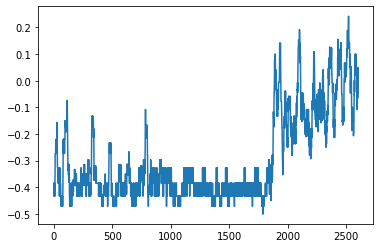

In [77]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:2600,"chi2"].plot()

In [41]:
df = seq_df
df.loc[:, "combined"] = (
        df.loc[:, "chi2"]
        + df.loc[:, "skew"]
        + df.loc[:, "polynuc"]
        - df.loc[:, "entropy"]
    )
df

pattern  skew   entropy   polynuc  \
test.telo.blocks chrI_ACA_left 0          1.0   1.0  0.647447  1.000000   
                               1          1.0   1.0  0.647447  1.000000   
                               2          1.0   1.0  0.610864  1.000000   
                               3          1.0   1.0  0.610864  1.000000   
                               4          1.0   1.0  0.562335  1.000000   
...                                       ...   ...       ...       ...   
                 chrVI         16146      0.0   0.1  1.235347  0.105263   
                               16147      0.0   0.1  1.235347  0.157895   
                               16148      0.0   0.0  1.248781  0.157895   
                               16149      0.0   0.0  1.279854  0.157895   
                               16150      0.0  -0.1  1.287022  0.157895   

                                          chi2  combined  
test.telo.blocks chrI_ACA_left 0      0.223319  1.575872  
                               1      0.223319  1.575872  
                               2      0.242785  1.631921  
                               3      0.242785  1.631921  
                               4      0.265585  1.703250  
...                                        ...       ...  
                 chrVI         16146  0.087585 -0.942498  
                               16147  0.087585 -0.889867  
                               16148  0.084252 -1.006634  
                               16149  0.087052 -1.034907  
                               16150  0.085385 -1.143742  

[62731 rows x 6 columns]

/home/khourhin/programs/miniconda3/envs/classic/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


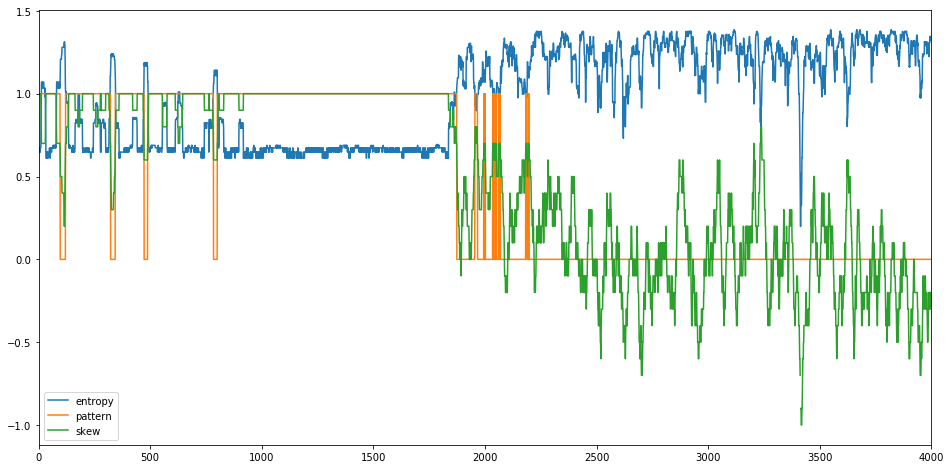

In [11]:
seq_df.loc["test.telo.blocks", "utg84"].loc[0:4000].plot()

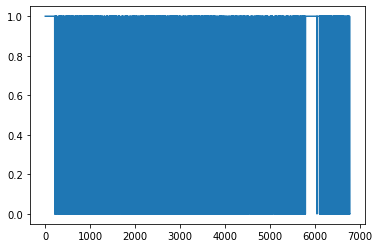

In [106]:
poly_df.loc[("test.telo.blocks", "chrI_ACA_left"),0:10000].transpose().plot()

# For control_not_telom_merging.py refactoring

L61

In [17]:
set("ATTTTAAAT") == {"A", "T"}

True

In [15]:
set(seq) 

{'A', 'C', 'G', 'N', 'T'}

In [4]:
seq = "ACGATCGATCGTAGCTGATGCTAGTCNNNNNGCTAGCTAGCTAGTCGTCGATGTC"

In [13]:
starts_N = seq.find("NNNNN")

In [14]:
starts_N

26

In [88]:
seq = "CACCACCACCACACACCACCACACACTGACGATGACTAGACGT"
for window in atl.sliding_window(seq, 0, len(seq), 10):
    print(atl.get_entropy(window))

0.6108643020548935
0.6730116670092565
0.6108643020548935
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.6730116670092565
0.9433483923290393
1.1682824501765625
1.1935496040981333
1.1935496040981333
1.2798542258336676
1.2798542258336676
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.366158847569202
1.3321790402101223
1.366158847569202
1.2798542258336674
1.3321790402101223
1.366158847569202
1.366158847569202


<generator object sliding_window at 0x7fe9f62e7850>

In [73]:
seq2 = ("../../misc/test.telo.blocks", "chrI_ACA_left")
seq2

('../../misc/test.telo.blocks', 'chrI_ACA_left')

In [85]:
import numpy as np
x = 0.1
x*np.log(x)


-0.23025850929940456